##  Importing all useful Libraries for our analyis ##

In [1]:
#Import impontant modules

import numpy as np 
import pandas as pd  
import scipy.stats as stats

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold

#Import ML classifiers
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier

import os
import ast
import itertools
import collections
from time import time
from tqdm import tqdm 
import collections
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import accuracy_score,f1_score, precision_score,recall_score, classification_report, confusion_matrix, precision_recall_fscore_support, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.utils import resample

import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting


## Prepare confusion matrix plots

In [2]:

def plot_confusion_matrix(cm, classes,
                          normalise=True,
                          text=False,
                          title='Confusion matrix',color='r',
                          xrotation=0,
                          yrotation=0,
                          saturation=2,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalisation can be applied by setting 'normalise=True'.
    """

    if normalise:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "{0} (normalised)".format(title)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks([0.009,0.91], ["Positive", 'Negative'],fontsize=18)
    plt.yticks([0.008,0.81], ["Positive", 'Negative'],fontsize=18,rotation=90)

    if text:
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]),
                                      range(cm.shape[1])):
            plt.text(j, i, "{0:.2f}".format(cm[i, j]), horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', color= 'black',fontsize=20, Weight="bold")
    plt.xlabel('Predicted label', color='black',fontsize=20, Weight="bold")

# We will first load the best Classifier 

In [3]:
import joblib
import pickle

# Unpickle the model from the file
with open('Malaria_classifier.pk2', 'rb') as file:
    loaded_Malaria_Classifer = pickle.load(file)

# # Specify the filename used to save the model in the first script
# model_filename = 'Model_01_With_Few_wave_numbers_.joblib'

# # Load the model
# loaded_Malaria_Classifer = joblib.load(model_filename)

# Validation for Parasitemia 6% vs 0% at Severe Anemia (12.5HMT)

In [4]:
############import the 12.5% dataset
Validation_125HM_Parasitemias=pd.read_csv('Severe_Anemia_12.5HM_alldata.csv') # Loading all data
print (Validation_125HM_Parasitemias)

######################### filter respective parasitemia 
validation125 = Validation_125HM_Parasitemias[(Validation_125HM_Parasitemias["Cat5"] == '6PRS') | (Validation_125HM_Parasitemias["Cat5"] == '0PRS')]
grouped_df2 = validation125.groupby(['Cat5']).size().reset_index(name="Count") # Group by Hematocrits & Parasitemia
print (grouped_df2)

##### rebelling
validation125["Cat5"]=validation125["Cat5"].replace({'6PRS': 'Positive', '0PRS': 'Negative'})
print (validation125)

#######################

# Select targets and features
X = validation125.iloc[:,3:]
Y = validation125["Cat5"]
print(X)

#######################

# balancing classes by rondom undersampling technique
usp = RandomUnderSampler(random_state = None)
X_rus, y_rus = usp.fit_sample(X, Y)
y_rus_count = collections.Counter(y_rus)
print(y_rus_count)
######################
# Scalling
X_rus= MinMaxScaler().fit_transform(X_rus)
print(X_rus)
######################
# Predict this Data set
Y_val_pred = loaded_Malaria_Classifer.predict(X_rus)

# Accuracy of our classifier to this data set
accuracy = accuracy_score(y_rus, Y_val_pred) 
print("Accuracy on validation 6PRS at 12.5HMT:%.2f%%" %(accuracy * 100.0))

      Unnamed: 0    Cat4        Cat5    3855    3853    3851    3849    3847  \
0              0  12.5HM  0.00003PRS  0.0141  0.0136  0.0153  0.0164  0.0162   
1              1  12.5HM  0.00003PRS  0.0143  0.0134  0.0148  0.0159  0.0159   
2              2  12.5HM  0.00003PRS  0.0147  0.0146  0.0143  0.0141  0.0141   
3              3  12.5HM  0.00003PRS  0.0158  0.0155  0.0152  0.0152  0.0153   
4              4  12.5HM  0.00003PRS  0.0161  0.0160  0.0157  0.0155  0.0156   
...          ...     ...         ...     ...     ...     ...     ...     ...   
1436        4504  12.5HM        6PRS  0.0147  0.0144  0.0144  0.0144  0.0144   
1437        4505  12.5HM        6PRS  0.0149  0.0144  0.0141  0.0141  0.0143   
1438        4506  12.5HM        6PRS  0.0150  0.0145  0.0144  0.0146  0.0148   
1439        4507  12.5HM        6PRS  0.0160  0.0161  0.0140  0.0128  0.0132   
1440        4508  12.5HM        6PRS  0.0165  0.0166  0.0148  0.0137  0.0139   

        3845    3843  ...     545     5

<ipython-input-4-b9838edd30b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation125["Cat5"]=validation125["Cat5"].replace({'6PRS': 'Positive', '0PRS': 'Negative'})


Counter({'Negative': 119, 'Positive': 119})
[[0.43410853 0.44444444 0.45744681 ... 0.19354839 0.14672216 0.2016129 ]
 [0.6744186  0.64444444 0.69148936 ... 0.48832036 0.40998959 0.43637993]
 [0.71317829 0.7037037  0.81914894 ... 0.52836485 0.43704475 0.3781362 ]
 ...
 [0.58914729 0.57037037 0.60638298 ... 0.32814238 0.34755463 0.39964158]
 [0.64341085 0.62962963 0.69148936 ... 0.72413793 0.65556712 0.57258065]
 [0.48837209 0.48148148 0.5        ... 0.3759733  0.30280957 0.28225806]]
Accuracy on validation 6PRS at 12.5HMT:96.22%


[0.96218487 0.95798319 0.97478992 0.96218487 0.96638655 0.97478992
 0.97058824 0.97058824 0.96218487 0.9789916  0.97058824 0.96638655
 0.94957983 0.95378151 0.96638655 0.95798319 0.96638655 0.95798319
 0.96218487 0.97058824 0.96218487 0.97058824 0.97058824 0.97478992
 0.96638655 0.95378151 0.9789916  0.94117647 0.94117647 0.94957983
 0.96218487 0.93277311 0.96218487 0.96218487 0.97058824 0.9789916
 0.97478992 0.96638655 0.95798319 0.95798319 0.94957983 0.96638655
 0.93277311 0.95378151 0.97058824 0.9789916  0.96218487 0.98319328
 0.96218487 0.95378151 0.97058824 0.95378151 0.97478992 0.96218487
 0.96638655 0.96218487 0.96218487 0.96218487 0.95798319 0.97478992
 0.97058824 0.96218487 0.96638655 0.96218487 0.97058824 0.94537815
 0.95798319 0.97058824 0.98739496 0.96218487 0.97058824 0.97478992
 0.9789916  0.96638655 0.94957983 0.96638655 0.95798319 0.96638655
 0.97058824 0.95798319 0.96218487 0.97478992 0.96638655 0.9789916
 0.97478992 0.97058824 0.96638655 0.95798319 0.96638655 0.966386

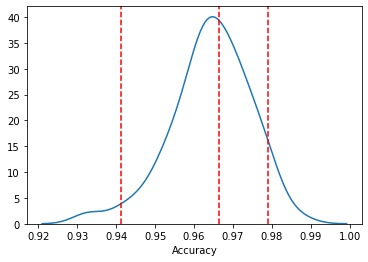

In [5]:
# Lets try with 100 bootstraps

n_bootstrap_samples = 100

# An array to store the validation scores for each bootstrap sample
validation_scores = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    # Create a bootstrap sample from the validation data
    X_val_bootstrap, y_val_bootstrap = resample(X_rus, y_rus,random_state=None)

    # Make predictions using the already trained model
    y_pred =  loaded_Malaria_Classifer.predict(X_val_bootstrap)

    # Evaluate the model on the bootstrap sample and store the validation score
    accuracy = accuracy_score(y_val_bootstrap, y_pred)
    validation_scores[i] = accuracy
    
print(validation_scores)

################################################
# get median
median = np.percentile(validation_scores, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(validation_scores, alpha/2)
upper_ci = np.percentile(validation_scores, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 10 bootstrapped samples " 
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

#################################################

sns.kdeplot(validation_scores)
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()


Normalized confusion matrix


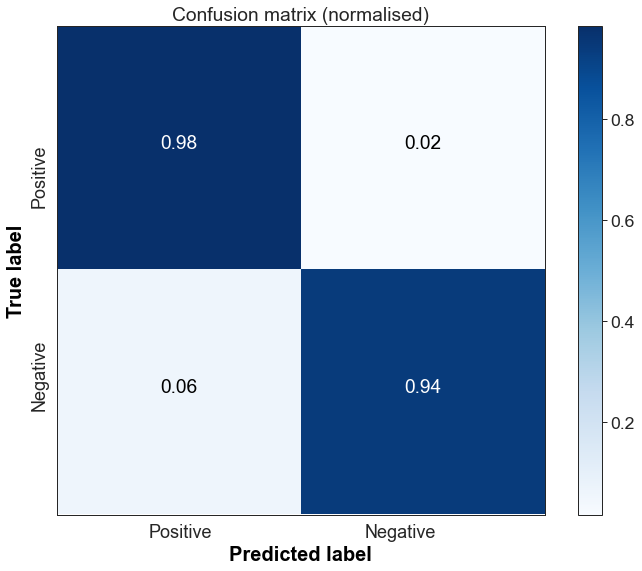

In [6]:
# plotting confusion matrix 

from matplotlib import rcParams

sns.set(context="paper",

    style="white",

    font_scale=2.0,
        
    rc={"font.family": "sans-serif"})

rcParams['font.sans-serif'] = 'Arial'

plt.rcParams["figure.figsize"] = [10,8] 
cm = confusion_matrix(y_rus, Y_val_pred) 
class_names = np.unique(np.sort(y_rus)) 
plot_confusion_matrix(cm, text=True,
                      color='black',
                      normalise=True,
                      classes=class_names) 


In [7]:
# Summarising precision, f_score, and recall for the training set

cr =  classification_report(y_rus, Y_val_pred)

print(cr)

              precision    recall  f1-score   support

    Negative       0.94      0.98      0.96       119
    Positive       0.98      0.94      0.96       119

    accuracy                           0.96       238
   macro avg       0.96      0.96      0.96       238
weighted avg       0.96      0.96      0.96       238



# Validation for Parasitemia 0.1% vs 0% at Severe Anemia (12.5HMT)

In [9]:
############import the 12.5% dataset
Validation_125HM_Parasitemias=pd.read_csv('Severe_Anemia_12.5HM_alldata.csv') # Loading all data
print (Validation_125HM_Parasitemias)

######################### filter respective parasitemia 
validation125 = Validation_125HM_Parasitemias[(Validation_125HM_Parasitemias["Cat5"] == '0.1PRS') | (Validation_125HM_Parasitemias["Cat5"] == '0PRS')]
grouped_df2 = validation125.groupby(['Cat5']).size().reset_index(name="Count") # Group by Hematocrits & Parasitemia
print (grouped_df2)

##### rebelling
validation125["Cat5"]=validation125["Cat5"].replace({'0.1PRS': 'Positive', '0PRS': 'Negative'})
print (validation125)

#######################

# Select targets and features
X = validation125.iloc[:,3:]
Y = validation125["Cat5"]
print(X)

#######################

# balancing classes by rondom undersampling technique
usp = RandomUnderSampler(random_state = None)
X_rus, y_rus = usp.fit_sample(X, Y)
y_rus_count = collections.Counter(y_rus)
print(y_rus_count)

######################
# Scalling
X_rus= MinMaxScaler().fit_transform(X_rus)
print(X_rus)
######################
#Predict this Data set
Y_val_pred = loaded_Malaria_Classifer.predict(X_rus)

# Accuracy of our classifier to this dataset
accuracy = accuracy_score(y_rus, Y_val_pred) 
print("Accuracy on validation 0.1PRS at 12.5HMT:%.2f%%" %(accuracy * 100.0))


      Unnamed: 0    Cat4        Cat5    3855    3853    3851    3849    3847  \
0              0  12.5HM  0.00003PRS  0.0141  0.0136  0.0153  0.0164  0.0162   
1              1  12.5HM  0.00003PRS  0.0143  0.0134  0.0148  0.0159  0.0159   
2              2  12.5HM  0.00003PRS  0.0147  0.0146  0.0143  0.0141  0.0141   
3              3  12.5HM  0.00003PRS  0.0158  0.0155  0.0152  0.0152  0.0153   
4              4  12.5HM  0.00003PRS  0.0161  0.0160  0.0157  0.0155  0.0156   
...          ...     ...         ...     ...     ...     ...     ...     ...   
1436        4504  12.5HM        6PRS  0.0147  0.0144  0.0144  0.0144  0.0144   
1437        4505  12.5HM        6PRS  0.0149  0.0144  0.0141  0.0141  0.0143   
1438        4506  12.5HM        6PRS  0.0150  0.0145  0.0144  0.0146  0.0148   
1439        4507  12.5HM        6PRS  0.0160  0.0161  0.0140  0.0128  0.0132   
1440        4508  12.5HM        6PRS  0.0165  0.0166  0.0148  0.0137  0.0139   

        3845    3843  ...     545     5

<ipython-input-9-99a9b482d6d0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation125["Cat5"]=validation125["Cat5"].replace({'0.1PRS': 'Positive', '0PRS': 'Negative'})


Counter({'Negative': 119, 'Positive': 119})
[[0.39805825 0.41666667 0.48484848 ... 0.20743405 0.24315444 0.29340761]
 [0.69902913 0.66666667 0.70707071 ... 0.52517986 0.52026287 0.53667595]
 [0.74757282 0.74074074 0.82828283 ... 0.56834532 0.54874042 0.47632312]
 ...
 [0.63106796 0.60185185 0.6969697  ... 0.73261391 0.71851041 0.59424327]
 [0.6407767  0.59259259 0.65656566 ... 0.8764988  0.93428258 0.82915506]
 [0.61165049 0.59259259 0.64646465 ... 0.64868106 0.72727273 0.65273909]]
Accuracy on validation 0.1PRS at 12.5HMT:95.80%


[0.96218487 0.97058824 0.94117647 0.96638655 0.95798319 0.94537815
 0.98319328 0.95798319 0.93277311 0.96218487 0.96218487 0.97058824
 0.95798319 0.96638655 0.96638655 0.93697479 0.94957983 0.94957983
 0.96218487 0.95798319 0.96218487 0.95798319 0.95798319 0.95378151
 0.96218487 0.94957983 0.95378151 0.96638655 0.96218487 0.96638655
 0.93697479 0.94957983 0.95378151 0.9789916  0.97058824 0.97058824
 0.96218487 0.94957983 0.94537815 0.95798319 0.96218487 0.94957983
 0.9789916  0.96638655 0.94957983 0.95378151 0.96218487 0.94117647
 0.92436975 0.97478992 0.9789916  0.95798319 0.96218487 0.94957983
 0.95798319 0.98319328 0.94537815 0.95798319 0.95378151 0.95378151
 0.9789916  0.94957983 0.95378151 0.96218487 0.95798319 0.93697479
 0.97478992 0.94537815 0.94537815 0.96218487 0.93277311 0.93697479
 0.95798319 0.94957983 0.9789916  0.96638655 0.97058824 0.94957983
 0.97058824 0.94957983 0.96218487 0.9789916  0.95798319 0.96638655
 0.96638655 0.95378151 0.96638655 0.94537815 0.96218487 0.9621

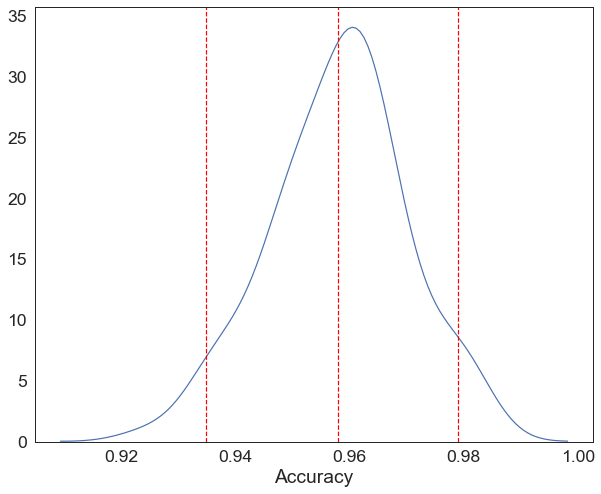

In [10]:
# Lets try with 100 bootstraps

n_bootstrap_samples = 100

# An array to store the validation scores for each bootstrap sample
validation_scores = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    # Create a bootstrap sample from the validation data
    X_val_bootstrap, y_val_bootstrap = resample(X_rus, y_rus,random_state=None)
   
    # Make predictions using the already trained model
    y_pred = loaded_Malaria_Classifer.predict(X_val_bootstrap)

    # Evaluate the model on the bootstrap sample and store the validation score
    accuracy = accuracy_score(y_val_bootstrap, y_pred)
    validation_scores[i] = accuracy
    
print(validation_scores)

################################################
# get median
median = np.percentile(validation_scores, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(validation_scores, alpha/2)
upper_ci = np.percentile(validation_scores, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 10 bootstrapped samples " 
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

#################################################

sns.kdeplot(validation_scores)
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()


Normalized confusion matrix


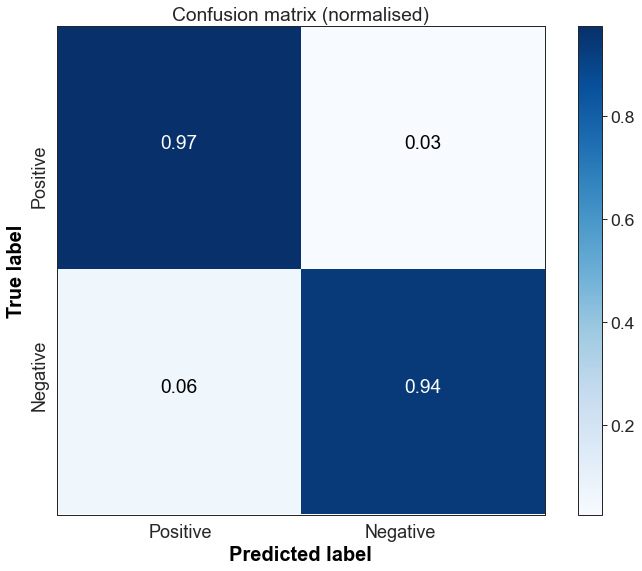

In [11]:
# plotting confusion matrix 
sns.set(context="paper",

    style="white",

    font_scale=2.0,
        
    rc={"font.family": "sans-serif"})

# Set the font to Arial
#rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'

plt.rcParams["figure.figsize"] = [10,8] 
cm = confusion_matrix(y_rus, Y_val_pred) 
class_names = np.unique(np.sort(y_rus)) 
plot_confusion_matrix(cm, text=True,
                      color='black',
                      normalise=True,
                      classes=class_names) 


In [12]:
# Summarising precision, f_score, and recall for the training set

cr =  classification_report(y_rus, Y_val_pred)

print(cr)

              precision    recall  f1-score   support

    Negative       0.94      0.97      0.96       119
    Positive       0.97      0.94      0.96       119

    accuracy                           0.96       238
   macro avg       0.96      0.96      0.96       238
weighted avg       0.96      0.96      0.96       238



# Validation for Parasitemia 0.002% vs 0% at Severe Anemia (12.5HMT)

In [16]:
############import the 12.5% dataset
Validation_125HM_Parasitemias=pd.read_csv('Severe_Anemia_12.5HM_alldata.csv') # Loading all data
print (Validation_125HM_Parasitemias)

######################### filter respective parasitemia 
validation125 = Validation_125HM_Parasitemias[(Validation_125HM_Parasitemias["Cat5"] == '0.002PRS') | (Validation_125HM_Parasitemias["Cat5"] == '0PRS')]
grouped_df2 = validation125.groupby(['Cat5']).size().reset_index(name="Count") # Group by Hematocrits & Parasitemia
print (grouped_df2)

##### rebelling
validation125["Cat5"]=validation125["Cat5"].replace({'0.002PRS': 'Positive', '0PRS': 'Negative'})
print (validation125)

#######################

# Select targets and features
X = validation125.iloc[:,3:]
Y = validation125["Cat5"]
print(X)

#######################

# balancing classes by rondom undersampling technique
usp = RandomUnderSampler(random_state = None)
X_rus, y_rus = usp.fit_sample(X, Y)
y_rus_count = collections.Counter(y_rus)
print(y_rus_count)

######################
# Scalling
X_rus= MinMaxScaler().fit_transform(X_rus)
print(X_rus)
######################
#Predict this Data set
Y_val_pred = loaded_Malaria_Classifer.predict(X_rus)

# Accuracy of our classifier to this dataset
accuracy = accuracy_score(y_rus, Y_val_pred) 
print("Accuracy on validation 0.002PRS at 12.5HMT:%.2f%%" %(accuracy * 100.0))


      Unnamed: 0    Cat4        Cat5    3855    3853    3851    3849    3847  \
0              0  12.5HM  0.00003PRS  0.0141  0.0136  0.0153  0.0164  0.0162   
1              1  12.5HM  0.00003PRS  0.0143  0.0134  0.0148  0.0159  0.0159   
2              2  12.5HM  0.00003PRS  0.0147  0.0146  0.0143  0.0141  0.0141   
3              3  12.5HM  0.00003PRS  0.0158  0.0155  0.0152  0.0152  0.0153   
4              4  12.5HM  0.00003PRS  0.0161  0.0160  0.0157  0.0155  0.0156   
...          ...     ...         ...     ...     ...     ...     ...     ...   
1436        4504  12.5HM        6PRS  0.0147  0.0144  0.0144  0.0144  0.0144   
1437        4505  12.5HM        6PRS  0.0149  0.0144  0.0141  0.0141  0.0143   
1438        4506  12.5HM        6PRS  0.0150  0.0145  0.0144  0.0146  0.0148   
1439        4507  12.5HM        6PRS  0.0160  0.0161  0.0140  0.0128  0.0132   
1440        4508  12.5HM        6PRS  0.0165  0.0166  0.0148  0.0137  0.0139   

        3845    3843  ...     545     5

<ipython-input-16-ab6171b2ef61>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation125["Cat5"]=validation125["Cat5"].replace({'0.002PRS': 'Positive', '0PRS': 'Negative'})


Counter({'Negative': 119, 'Positive': 119})
[[0.27058824 0.31521739 0.42391304 ... 0.12851406 0.11632454 0.14109166]
 [0.63529412 0.60869565 0.66304348 ... 0.39457831 0.36363636 0.41091658]
 [0.69411765 0.69565217 0.79347826 ... 0.43072289 0.38905181 0.34397528]
 ...
 [0.25882353 0.25       0.31521739 ... 0.6686747  0.62170088 0.52935118]
 [0.74117647 0.76086957 0.90217391 ... 0.65261044 0.62170088 0.65602472]
 [0.72941176 0.72826087 0.59782609 ... 0.68674699 0.75366569 0.78269825]]
Accuracy on validation 0.002PRS at 12.5HMT:94.12%


[0.90756303 0.96218487 0.95378151 0.94537815 0.94957983 0.94117647
 0.92436975 0.92436975 0.93697479 0.96218487 0.91596639 0.94117647
 0.95798319 0.95378151 0.95798319 0.95798319 0.94957983 0.96638655
 0.96218487 0.91596639 0.94117647 0.93277311 0.92857143 0.93277311
 0.90756303 0.94117647 0.94537815 0.90756303 0.95798319 0.94117647
 0.94117647 0.95378151 0.95798319 0.95798319 0.94957983 0.92436975
 0.96218487 0.94117647 0.96638655 0.93277311 0.95378151 0.92436975
 0.96638655 0.93697479 0.94537815 0.94537815 0.93277311 0.93697479
 0.94537815 0.91176471 0.95378151 0.94957983 0.92857143 0.94957983
 0.95378151 0.9789916  0.92857143 0.94537815 0.94957983 0.94537815
 0.92857143 0.95378151 0.92436975 0.94537815 0.92857143 0.94957983
 0.94957983 0.96218487 0.94957983 0.94957983 0.94957983 0.92857143
 0.95378151 0.97058824 0.90336134 0.94537815 0.92857143 0.94957983
 0.94537815 0.93277311 0.93277311 0.95798319 0.93697479 0.96218487
 0.92857143 0.96218487 0.96218487 0.94117647 0.94537815 0.9495

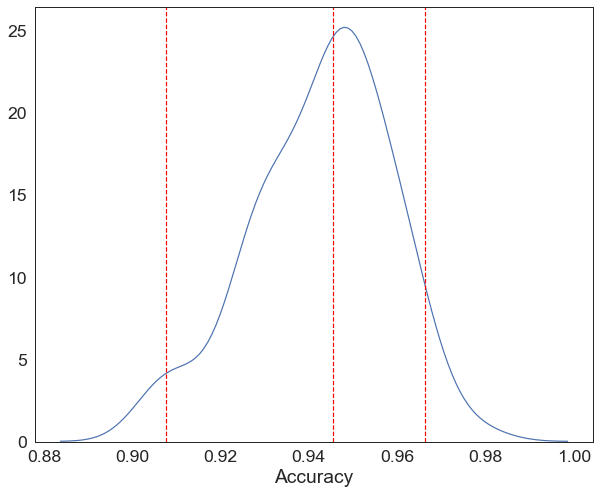

In [17]:
# Lets try with 100 bootstraps

# 100 bootstraps
n_bootstrap_samples = 100

# An array to store the validation scores for each bootstrap sample
validation_scores = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    # Create a bootstrap sample from the validation data
    X_val_bootstrap, y_val_bootstrap = resample(X_rus, y_rus,random_state=None)
   
    # Make predictions using the already trained model
    y_pred = loaded_Malaria_Classifer.predict(X_val_bootstrap)

    # Evaluate the model on the bootstrap sample and store the validation score
    accuracy = accuracy_score(y_val_bootstrap, y_pred)
    validation_scores[i] = accuracy
    
print(validation_scores)

################################################
# get median
median = np.percentile(validation_scores, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(validation_scores, alpha/2)
upper_ci = np.percentile(validation_scores, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 10 bootstrapped samples " 
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

#################################################

sns.kdeplot(validation_scores)
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()


Normalized confusion matrix


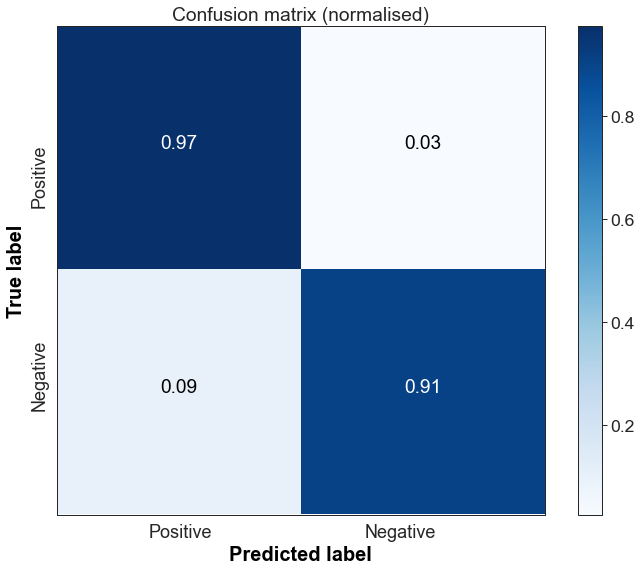

In [18]:
# plotting confusion matrix 
sns.set(context="paper",

    style="white",

    font_scale=2.0,
        
    rc={"font.family": "sans-serif"})
# Set the font to Arial
#rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'

plt.rcParams["figure.figsize"] = [10,8] 
cm = confusion_matrix(y_rus, Y_val_pred) 
class_names = np.unique(np.sort(Y)) 
plot_confusion_matrix(cm, text=True,
                      color='black',
                      normalise=True,
                      classes=class_names) 


In [19]:
# Summarising precision, f_score, and recall for the training set

cr =  classification_report(y_rus, Y_val_pred)

print(cr)

              precision    recall  f1-score   support

    Negative       0.91      0.97      0.94       119
    Positive       0.97      0.91      0.94       119

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238



# Validation for Parasitemia 0.00003% vs 0% at Severe Anemia (12.5HMT)

In [23]:
############import the 12.5% dataset
Validation_125HM_Parasitemias=pd.read_csv('Severe_Anemia_12.5HM_alldata.csv') # Loading all data
print (Validation_125HM_Parasitemias)

######################### filter respective parasitemia 
validation125 = Validation_125HM_Parasitemias[(Validation_125HM_Parasitemias["Cat5"] == '0.00003PRS') | (Validation_125HM_Parasitemias["Cat5"] == '0PRS')]
grouped_df2 = validation125.groupby(['Cat5']).size().reset_index(name="Count") # Group by Hematocrits & Parasitemia
print (grouped_df2)

##### rebelling
validation125["Cat5"]=validation125["Cat5"].replace({'0.00003PRS': 'Positive', '0PRS': 'Negative'})
print (validation125)

#######################

# Select targets and features
X = validation125.iloc[:,3:]
Y = validation125["Cat5"]
print(X)

#######################

#balancing classes by rondom undersampling technique
usp = RandomUnderSampler(random_state = None)
X_rus, y_rus = usp.fit_sample(X, Y)
y_rus_count = collections.Counter(y_rus)
print(y_rus_count)

######################
# # # Scalling
X_rus= MinMaxScaler().fit_transform(X_rus)
print(X_rus)
######################
#Predict this new dataset
Y_val_pred = loaded_Malaria_Classifer.predict(X_rus)

# Accuracy of our classifier to this dataset
accuracy = accuracy_score(y_rus, Y_val_pred) 
print("Accuracy on validation 0.00003PRS at 12.5HMT:%.2f%%" %(accuracy * 100.0))

      Unnamed: 0    Cat4        Cat5    3855    3853    3851    3849    3847  \
0              0  12.5HM  0.00003PRS  0.0141  0.0136  0.0153  0.0164  0.0162   
1              1  12.5HM  0.00003PRS  0.0143  0.0134  0.0148  0.0159  0.0159   
2              2  12.5HM  0.00003PRS  0.0147  0.0146  0.0143  0.0141  0.0141   
3              3  12.5HM  0.00003PRS  0.0158  0.0155  0.0152  0.0152  0.0153   
4              4  12.5HM  0.00003PRS  0.0161  0.0160  0.0157  0.0155  0.0156   
...          ...     ...         ...     ...     ...     ...     ...     ...   
1436        4504  12.5HM        6PRS  0.0147  0.0144  0.0144  0.0144  0.0144   
1437        4505  12.5HM        6PRS  0.0149  0.0144  0.0141  0.0141  0.0143   
1438        4506  12.5HM        6PRS  0.0150  0.0145  0.0144  0.0146  0.0148   
1439        4507  12.5HM        6PRS  0.0160  0.0161  0.0140  0.0128  0.0132   
1440        4508  12.5HM        6PRS  0.0165  0.0166  0.0148  0.0137  0.0139   

        3845    3843  ...     545     5

<ipython-input-23-1e056331eb33>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation125["Cat5"]=validation125["Cat5"].replace({'6PRS': 'Positive', '0PRS': 'Negative'})


Counter({'Negative': 119, 'Positive': 119})
[[0.36734694 0.38235294 0.43333333 ... 0.08426396 0.05135952 0.14891612]
 [0.68367347 0.64705882 0.67777778 ... 0.35329949 0.306143   0.39585297]
 [0.73469388 0.7254902  0.81111111 ... 0.38984772 0.33232628 0.33459001]
 ...
 [0.68367347 0.6372549  0.7        ... 0.54111675 0.52366566 0.52780396]
 [0.48979592 0.44117647 0.47777778 ... 0.54111675 0.49244713 0.51649387]
 [0.74489796 0.68627451 0.76666667 ... 0.6284264  0.60624371 0.68426013]]
Accuracy on validation 0.00003PRS at 12.5HMT:94.12%


## Run with 100 bootstraps

[0.92436975 0.94957983 0.94537815 0.91596639 0.92857143 0.93277311
 0.96218487 0.94117647 0.94957983 0.93697479 0.94957983 0.93697479
 0.96638655 0.94117647 0.94957983 0.96218487 0.94537815 0.94537815
 0.96638655 0.93277311 0.95378151 0.94117647 0.91176471 0.94537815
 0.92857143 0.94117647 0.93277311 0.94117647 0.95798319 0.92016807
 0.94117647 0.94537815 0.96218487 0.94117647 0.92857143 0.94537815
 0.92857143 0.93277311 0.94957983 0.94957983 0.94957983 0.94957983
 0.93697479 0.96638655 0.96218487 0.94537815 0.92436975 0.94537815
 0.96638655 0.95378151 0.92016807 0.92016807 0.95378151 0.95378151
 0.91596639 0.94537815 0.93697479 0.94957983 0.92857143 0.93277311
 0.95378151 0.93697479 0.95798319 0.94537815 0.95378151 0.89495798
 0.93697479 0.93697479 0.94117647 0.92436975 0.94537815 0.93277311
 0.96638655 0.93277311 0.95378151 0.92436975 0.94117647 0.93697479
 0.92016807 0.91596639 0.95798319 0.91596639 0.94957983 0.96638655
 0.95798319 0.92436975 0.93697479 0.94537815 0.94957983 0.9411

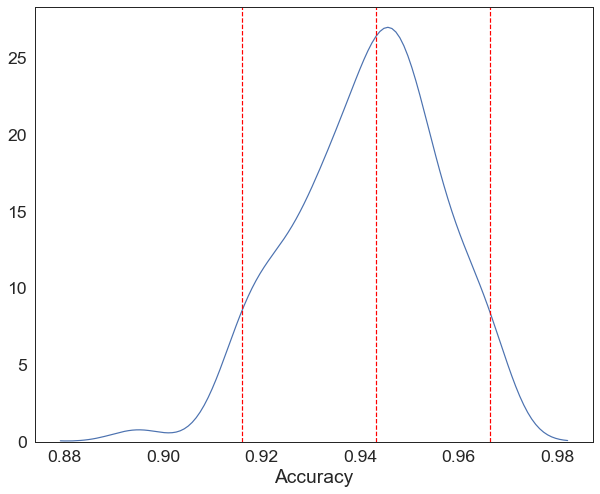

In [26]:
# 100 bootstraps
n_bootstrap_samples = 100

# Initialize an array to store the validation scores for each bootstrap sample
validation_scores = np.zeros(n_bootstrap_samples)

for i in range(n_bootstrap_samples):
    # Create a bootstrap sample from the validation data
    X_val_bootstrap, y_val_bootstrap = resample(X_rus, y_rus,random_state=None)
   
    # Make predictions using the already trained model
    y_pred = loaded_Malaria_Classifer.predict(X_val_bootstrap)

    # Evaluate the model on the bootstrap sample and store the validation score
    accuracy = accuracy_score(y_val_bootstrap, y_pred)
    validation_scores[i] = accuracy
    
print(validation_scores)

################################################
# get median
median = np.percentile(validation_scores, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(validation_scores, alpha/2)
upper_ci = np.percentile(validation_scores, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 10 bootstrapped samples " 
      f"Median accuracy is {median:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")

#################################################

sns.kdeplot(validation_scores)
plt.xlabel("Accuracy")
plt.axvline(median,0, 14, linestyle="--", color="red")
plt.axvline(lower_ci,0, 14, linestyle="--", color="red")
plt.axvline(upper_ci,0, 14, linestyle="--", color="red")
plt.show()


Normalized confusion matrix


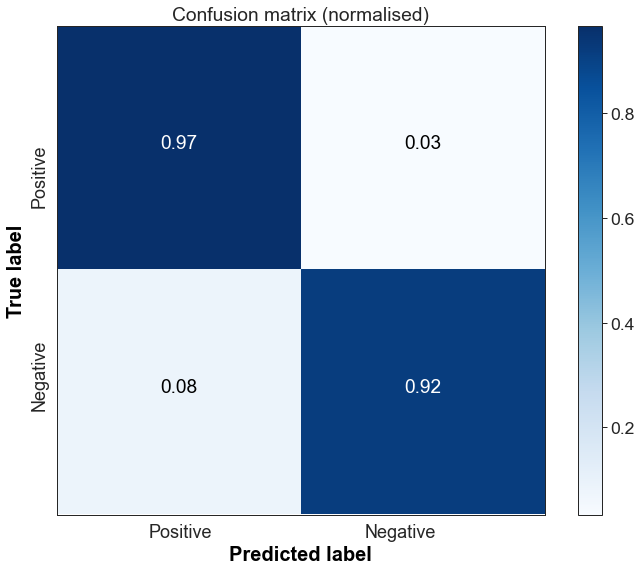

In [27]:
# plotting confusion matrix 
sns.set(context="paper",

    style="white",

    font_scale=2.0,
        
    rc={"font.family": "sans-serif"})
# Set the font to Arial
#rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Arial'


plt.rcParams["figure.figsize"] = [10,8] 
cm = confusion_matrix(y_rus, Y_val_pred) 
class_names = np.unique(np.sort(Y)) 
plot_confusion_matrix(cm, text=True,
                      color='black',
                      normalise=True,
                      classes=class_names) 
